In [1]:
!pip install git+https://github.com/AI-Guru/ngdlm.git

  Cloning https://github.com/AI-Guru/ngdlm.git to /private/var/folders/yp/43nlc6nj4xxf7kw4579jkzqc0000gn/T/pip-req-build-exhgmalu
  Running command git clone -q https://github.com/AI-Guru/ngdlm.git /private/var/folders/yp/43nlc6nj4xxf7kw4579jkzqc0000gn/T/pip-req-build-exhgmalu
  Created wheel for ngdlm: filename=ngdlm-0.0.3-py2.py3-none-any.whl size=31681 sha256=e2a63e39eea7918305ba15b79bc1fc56dc7bdd5148a20229174ad00d5d45c766
  Stored in directory: /private/var/folders/yp/43nlc6nj4xxf7kw4579jkzqc0000gn/T/pip-ephem-wheel-cache-w8biym28/wheels/d4/7e/be/8ac59313d33bbe9982a86898ec70ffec0eac17d3db4f115799
Successfully built ngdlm


# Variational Autoencoder

In [2]:
# with standard encoders - you have wholes in the latent space
# variational - ?interpolationable? - so no wholes and you can calculate a distance - images, Twitter
                # one melody to the next

In [3]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
from tensorflow.keras import models, layers
from ngdlm import models as ngdlmodels#next geenration learning models
from ngdlm import utils as ngdlutils
from tensorflow.keras.datasets import mnist
import numpy as np

In [4]:
(x_input_train, _), (x_input_test, y_output_test) = mnist.load_data()   # Autoencoder = we do not need any lables and that is why we drop them

x_input_train = x_input_train.astype("float32") / 255.0 #normalization - all values will be between 1 & 0
y_input_test = x_input_test.astype("float32") / 255.0

print(x_input_train.shape, x_input_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [5]:
latent_dim = 2 # easier to visualise

# I apply layers on layers 
encoder_input = layers.Input(shape=(28, 28)) # if we wanted a Conv - then we need 28,28,1
encoder_output = layers.Reshape((28 * 28, ))(encoder_input)
encoder_output = layers.Dense(512, activation="relu")(encoder_output)
encoder = models.Model(encoder_input, encoder_output)
#encoder.summary()

decoder_input = layers.Input(shape=(latent_dim, ))

decoder_output = layers.Dense(512, activation="relu")(decoder_input)
decoder_output = layers.Dense(28 * 28, activation="sigmoid")(decoder_output)
decoder_output = layers.Reshape((28, 28))(decoder_output)
decoder = models.Model(decoder_input, decoder_output)
#decoder.summary()


vae = ngdlmodels.VAE( # glueing function
    encoder,
    decoder,
    latent_dim=latent_dim
)
vae.summary() # column connected to - when your NN is not sequential 
                #- see picture in notes (it splits at dense_22)

vae.compile(
    optimizer="adam",
    loss="binary_crossentropy"
)

history = vae.fit(
    x_input_train, x_input_train,
    epochs=100, 
    batch_size=512,
    validation_data=(x_input_test, x_input_test)
)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Encoder:
Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
reshape (Reshape)               (None, 784)          0           input_1[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 512)          401920      reshape[0][0]                    
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 2)            1026        dense[0][0]                      
__

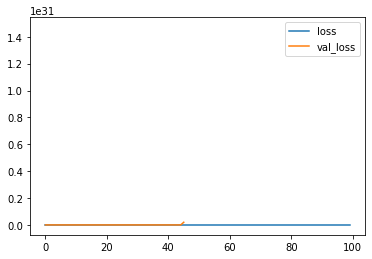

In [6]:
ngdlutils.render_history(history)

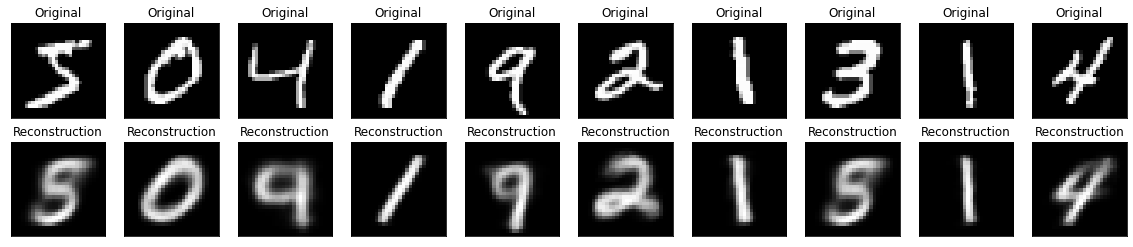

In [7]:
ngdlutils.render_image_reconstructions(
    vae, x_input_train[0:10]
)
# we predict only 2 Gaussian functions and it is pretty decent

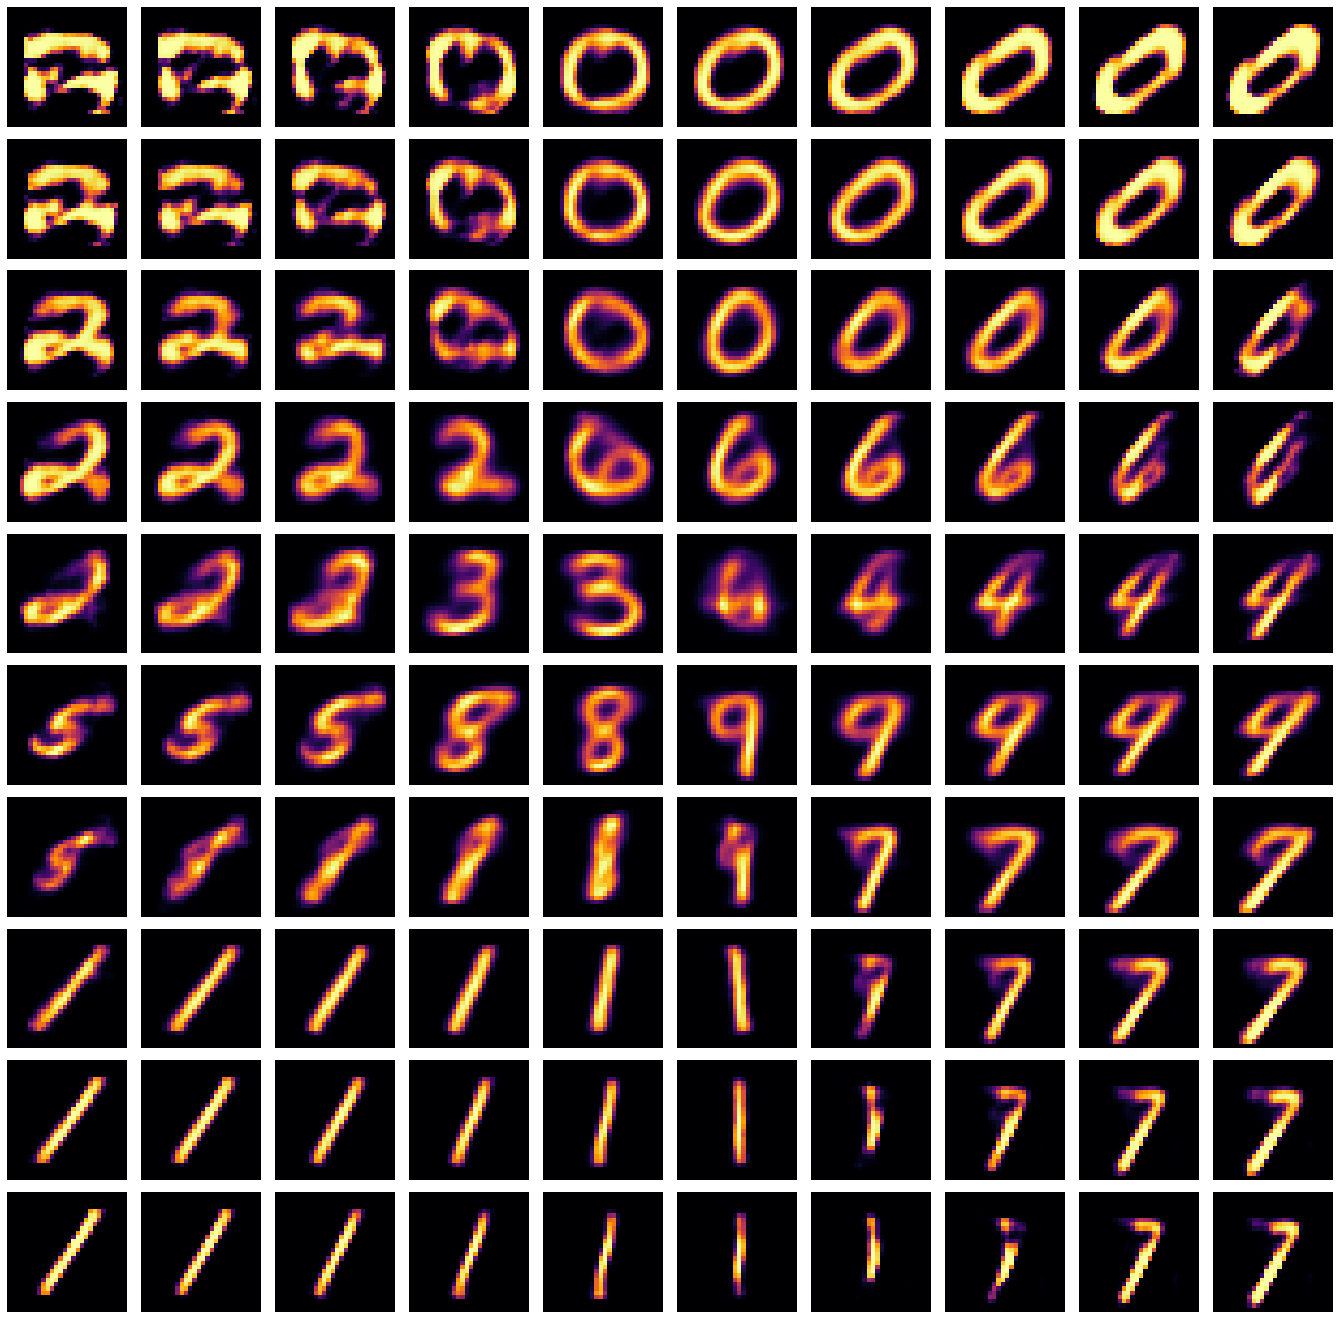

In [8]:
ngdlutils.render_image_latent_space(
    vae.decoder, 10, cmap="inferno"
)

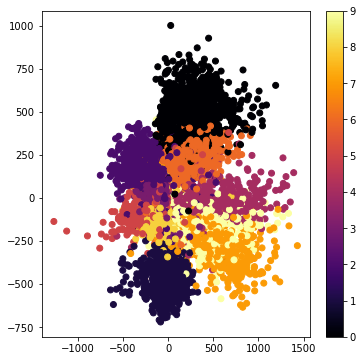

In [9]:
ngdlutils.render_encodings(
    vae.encoder, x_input_test, y_output_test
)
# this is the z - 2D and that is why we can visualise it
# 0 & 1 are so far from each other, because they look different
# 5 is all over the place, because if you twick it slightly, it could look like 8, 6 etc